# Neural networks

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets as data

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

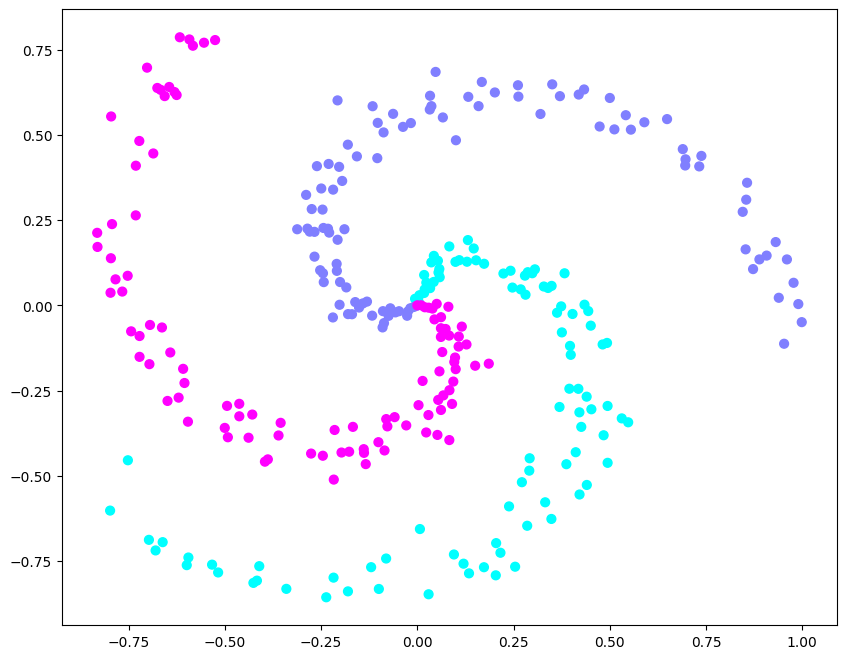

In [20]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.cool);

In [21]:
def relu(X, W, b):      return np.maximum(0, np.dot(X, W) + b)
def sigmoid(X, W, b):   return 1/(1 + np.exp(-(np.dot(X, W) + b))) 

def fit(X, y, h, K, step_size, reg, activation):
    """
    h: size of hidden layer
    K: number of classes
    step_size: learning rate
    reg: regularization strength
    """

    # initialize parameters randomly
    # Network has 1 input layer of size D (dimensionality) and 1 output layer of size K (# classes)
    D = X.shape[1]
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(10000):
        # evaluate class scores, [N x K]
        hidden_layer = activation(X, W, b)
        scores = np.dot(hidden_layer, W2) + b2

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        if i % 1000 == 0:
            print("iteration {}: loss {}".format(i, loss))

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples

        # backpropagate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
        # finally into W,b
        dW = np.dot(X.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
    return W, b, W2, b2

In [22]:
def score(X, y, W, b, W2, b2):
    # evaluate training set accuracy
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    return np.mean(predicted_class == y)

In [23]:
h = 20 # size of hidden layer
# some hyperparameters
step_size = 1e0 # learning rate
reg = 1e-3 # regularization strength
W, b, W2, b2 = fit(X, y, h, K, step_size, reg, relu)

iteration 0: loss 1.0986834637792375
iteration 1000: loss 0.6777695009163653
iteration 2000: loss 0.6796281171976689
iteration 3000: loss 0.8072666801910308
iteration 4000: loss 0.7366059482777563
iteration 5000: loss 0.7126141035920653
iteration 6000: loss 0.7686272110185914
iteration 7000: loss 0.7652948593569653
iteration 8000: loss 0.7515540363920226
iteration 9000: loss 0.716787176576082


In [24]:
# evaluate training set accuracy
print('training accuracy: {}'.format(score(X, y, W, b, W2, b2)))

training accuracy: 0.7066666666666667


(-1.856808263789949, 1.7831917362100542)

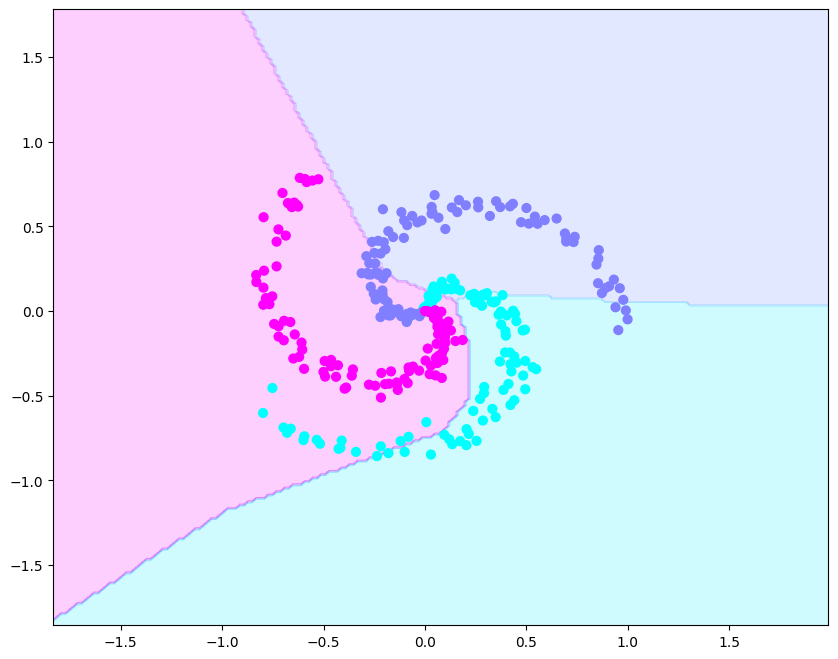

In [25]:
# plot the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.cool, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.cool)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

## try with training and test data

In [26]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

h = 100 # size of hidden layer
# some hyperparameters
step_size = 1e-0 # learning rate
reg = 1e-3 # regularization strength
W, b, W2, b2 = fit(X_train, y_train, h, K, step_size, reg, relu)

iteration 0: loss 1.098711533962294
iteration 1000: loss 0.38916522093940686
iteration 2000: loss 0.2551577776248586
iteration 3000: loss 0.2506577731807529
iteration 4000: loss 0.24443958593230036
iteration 5000: loss 0.24261085696778006
iteration 6000: loss 0.24156433390997428
iteration 7000: loss 0.24097192935707462
iteration 8000: loss 0.2403891680902318
iteration 9000: loss 0.23995186256360498


In [27]:
# evaluate training set accuracy
print('training accuracy: {}'.format(score(X_train, y_train, W, b, W2, b2)))

# Test accuracy
print('test accuracy: {}'.format(score(X_test, y_test, W, b, W2, b2)))

training accuracy: 0.9714285714285714
test accuracy: 0.9888888888888889


## What happens if we have too few neurons in the hidden layer (low complexity)

In [28]:
h = 20 # size of hidden layer
# some hyperparameters
step_size = 1e-0 # learning rate
reg = 1e-3 # regularization strength
W, b, W2, b2 = fit(X_train, y_train, h, K, step_size, reg, relu)

# evaluate training set accuracy
print('training accuracy: {}'.format(score(X_train, y_train, W, b, W2, b2)))

# Test accuracy
print('test accuracy: {}'.format(score(X_test, y_test, W, b, W2, b2)))

iteration 0: loss 1.0985349214844837
iteration 1000: loss 0.7533158982733918
iteration 2000: loss 0.8266651903604225
iteration 3000: loss 0.7708174551542812
iteration 4000: loss 0.7952314934845894
iteration 5000: loss 0.719078841202488
iteration 6000: loss 0.710744195947739
iteration 7000: loss 0.7427009345634851
iteration 8000: loss 0.7398924421508215
iteration 9000: loss 0.7071973383516262
training accuracy: 0.6476190476190476
test accuracy: 0.6666666666666666


## How about applying this to a real problem?

In [29]:
# Load breast cancer data
breastCancerFr = data.load_breast_cancer(as_frame=True).data
X = data.load_breast_cancer().data
y = data.load_breast_cancer(as_frame=True).target

K = 2 # number of classes

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Use the training set for training the model
# initialize parameters randomly
# Network has 1 input layer of size D (dimensionality) and 1 output layer of size K (# classes)
h = 400 # size of hidden layer
# some hyperparameters
step_size = 1e-2 # learning rate
reg = 1e-5 # regularization strength
W, b, W2, b2 = fit(X_train, y_train, h, K, step_size, reg, sigmoid)

# evaluate training set accuracy
print('training accuracy: {}'.format(score(X_train, y_train, W, b, W2, b2)))

# Test accuracy
print('test accuracy: {}'.format(score(X_test, y_test, W, b, W2, b2)))

iteration 0: loss 0.6750599626178703


/var/folders/q3/_ggffzj933s64pz_z4jk4ds80000gn/T/ipykernel_71923/4030027382.py:2: RuntimeWarning: overflow encountered in exp
  def sigmoid(X, W, b):   return 1/(1 + np.exp(-(np.dot(X, W) + b)))


iteration 1000: loss 0.5293503322040368
iteration 2000: loss 0.31498977480486196
iteration 3000: loss 0.2985850265845327
iteration 4000: loss 0.2963379307538703
iteration 5000: loss 0.301973283606428
iteration 6000: loss 0.2786966192699785
iteration 7000: loss 0.27516760333767776
iteration 8000: loss 0.2784982556590568
iteration 9000: loss 0.2865104761547111
training accuracy: 0.9045226130653267
test accuracy: 0.9473684210526315


## with tensorflow

In [30]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(400, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
10/13 [======================>.......] - ETA: 0s - loss: 0.4879 - accuracy: 0.8031

2022-11-14 14:15:47.671891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 8ms/step - loss: 0.4783 - accuracy: 0.8015
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3181 - accuracy: 0.8995
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2657 - accuracy: 0.9146
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2564 - accuracy: 0.9020
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2582 - accuracy: 0.8995
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2284 - accuracy: 0.9121
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2474 - accuracy: 0.8970
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.9146
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2149 - accuracy: 0.9246
Epoch 10/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2093 - accuracy: 0.9221


In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 0.2096 - accuracy: 0.9298

Test accuracy: 0.9298245906829834


2022-11-14 14:15:48.768029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
